#### Question 1 (10 Points)
#### List as many use cases for the dataset as possible.

Existem vários usos para o data set, listados abaixo com uma breve descrição:

- **Previsão de Vendas**<br>
Obter as informações de pedidos, quantidades, preços e datas para planejar e prever valores de venda futuros com modelos preditivos


- **Análises de Séries Temporais**<br>
Agrupar dados como pedidos, volume de vendas e receita por data para analisar nas séries temporais características como tendência, sazonalidade, resíduo e predição de valores


- **Segmentação de Clientes e Produtos**<br>
A partir de determinadas características, como padrão de consumo e preços, é possível criar classes de produtos e classes de clientes (semelhante ao que group_code e segment_code representam), para que ações específicas para cada classe possam ser planejadas


- **Recomendação de Produtos**<br>
Criação de um modelo de recomendação de produtos baseado na relação dos clientes com produtos em pedidos anteriores e das características dos produtos da base. O modelo usaria a preferência dos clientes para recomendar produtos semelhantes.


- **Previsão de Churn e Customer Survival**<br>
Churn é basicamente uma métrica que indica quantos clientes uma empresa perdeu. É possível prever o valor de churn para os clientes da base utilizando dados do padrão de consumo dos clientes em relação aos pedidos, produtos e preços. Customer Survival está relacionado a um conjunto de técnicas que define quanto tempo o cliente permanece em uma relação ativa com a empresa. 

#### Question 2 (10 Points)

#### Pick one of the use cases you listed in question 1 and describe how building a statistical model based on the dataset could best be used to improve the business this data comes from.

#### Previsão de Churn

Customer churn ou customer attrition ocorre quando consumidores param de comprar produtos ou serviços de uma empresa. A evasão de clientes pode ocorrer, por exemplo, porque o produto não atende as expectativas do cliente ou por uma experiência de atendimento ruim. A taxa de churn geralmente é obtida dividindo a quantidade de cancelamentos pela quantidade de clientes ativos em um período. 

Este é um assunto de importância porque muitas vezes o custo para as empresas adquirirem um consumidor novo é mais alto do que manter os consumidores antigos. Logo, mesmo que a empresa adquira novos clientes na mesma porporção que perde clientes antigos, ainda assim a empresa estará perdendo dinheiro. E mesmo se os clientes perdidos não forem tão numerosos quanto os clientes novos, eles podem representar uma peso grande na receita da empresa que irá diminuir. 

**Se uma empresa encontra um método de classificar com antecedência um cliente com uma probabilidade alta de virar churn, ela pode proativamente criar planos de ação para mantê-lo.**

Este data set oferece características importantes que podem ser utilizadas para criar um modelo estatístico para prever churn e obter ganhos com a previsão. Por exemplo, a empresa poderia utilizar este modelo como uma ferramenta no ponto de venda, alertando vendedores que clientes com probabilidade alta de churn necessitam de uma ação especial para que continuem a se relacionar com a empresa. Ou então a área comercial da empresa poderia utilizar a base de consumidores classificados como potenciais churn para renegociar termos de contratos de maneira a favorecer melhor os clientes e mantê-los com a empresa por mais. Os modelos permitem também identificar quais características influenciam na classificação de churn. Sabendo disso, a empresa pode utilizar o modelo estatístico para melhorar seu produto, serviço ou atendimento em relação a estas características determinantes para churn.

#### Question 3 (20 Points)
#### Implement the model you described in question 2, preferably in Python. The code has to retrieve the data, train and test a statistical model, and report relevant performance criteria. Ideally, we should be able to replicate your analysis from your submitted source-code, so please explicit the versions of the tools and packages you are using.

Os modelos para predição de churn de clientes serão desenvolvidos neste notebook. As bibliotecas necessárias para rodar este notebook em outros ambientes foram geradas no arquivo **requirements.txt**.

A estratégia foi testar modelos com dois algoritmos diferentes em uma base com features de valores agregados e gerados da base original. A escolha de um modelo mais convencional contra um modelo mais robusto foi proposital para contrastar o desempenho de cada um deles em identificar os casos de churn. 

O primeiro é a regressão logística, geralmente usada para prever a ocorrência de algum evento com saída discreta (verdadeiro ou falso, ou 'é churn ou não'). O segundo é um algoritmo conhecidamente mais robusto e preciso chamado XGBoost. Ele é utilizado para classificação e regressão, trabalhando com um modelo conjunto, que soma a previsão de várias árvores de decisão juntas.

Sumário do que foi desenvolvido:

1. **Funções e Bibliotecas**

2. **File Import**

3. **Data Overview**

4. **Exploratory Data Analysis**

5. **Feature Engineering**

6. **Regressão Logística**

7. **XGBoost**

8. **Comparação de Resultados dos Modelos**

9. **Prevendo Casos Nulos da Base**

#### Question 4 (60 Points)
#### A. Explain each and every of your design choices, you can use jupyter notebooks. (e.g., preprocessing, model selection, hyper parameters, evaluation criteria). Compare and contrast your choices with alternative methodologies.

Tanto o código, quanto as explicações das decisões, a avaliação dos resultados dos modelos ou possíveis comparações com métodos alternativos estão em comentários junto com o desenvolvimento. O notebook está bastante explicativo em relação ao que foi realizado e aos resultados. 

No fim do notebook há a resposta para a parte B desta questão.

## Funções e Bibliotecas

- Bibliotecas utilizadas e função para plotar confusion matrix

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix
import scikitplot as skplt

import xgboost as xgb
from xgboost import XGBClassifier
import shap
shap.initjs()

from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

In [2]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True Churn')
    plt.xlabel('Predicted Churn\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## File Import

- Com a análise prévia da base, é possível determinar alguns parâmetros de tipo de data para ler o JSON
- is_churn: valor esperado é 0 ou 1, portanto int. Existem valores nulos, logo o tipo de data importado final é object. Nulos serão tratados mais tarde.
- register_date: valor esperado deve ser do tipo datetime, caso seja necessário agrupamento de informações por data


In [3]:
sales = pd.read_json('dataset.json', dtype={'is_churn': int,'register_date': 'datetime64'})

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204428 entries, 0 to 204427
Data columns (total 14 columns):
branch_id           204428 non-null int64
customer_code       204428 non-null int64
group_code          204428 non-null int64
is_churn            202513 non-null object
item_code           204428 non-null int64
item_total_price    204428 non-null float64
order_id            204428 non-null int64
quantity            204428 non-null int64
register_date       204428 non-null datetime64[ns]
sales_channel       204428 non-null int64
segment_code        204428 non-null int64
seller_code         204428 non-null int64
total_price         204428 non-null float64
unit_price          204428 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(9), object(1)
memory usage: 21.8+ MB


## Data Overview 

Principais insights:
- O data set é apresentado originalmente como uma **base transacional**
- Os dados representam informações sobre **orders (pedidos) de clientes** em relação à diferente **itens** em uma **data** específica
- Como uma order pode conter diferentes produtos, logo a **linha order_id pode se repetir**
- Cada linha repetida representa um item_code diferente para aquela order
- Contudo, cada order_id se refere à um customer_code ou cliente em específico
- No exemplo abaixo a order_id=0 do customer_code=588 possui item_codes=[1768,282,2675] 
- No exemplo abaixo é possível ver 3 diferentes order_ids
- Como o **branch_id assume somente um valor em toda a base (0)**, este atributo não faria diferença em futuros modelos
- Na coluna **is_churn** há exatamente **1915 valores nulos**, dentro de uma **base de 204.428 linhas** 
- Todos valores nulos de is_churn têm segment_code=7 e group_code=3

In [5]:
sales.sort_values('order_id').head(12)

,branch_id,customer_code,group_code,is_churn,item_code,item_total_price,order_id,quantity,register_date,sales_channel,segment_code,seller_code,total_price,unit_price
92104,0,588,0,0,1768,166.04,0,2,2008-01-04,6,0,212,710.79,79.07
51962,0,588,0,0,282,363.08,0,20,2008-01-04,6,0,212,710.79,16.21
164964,0,588,0,0,2675,255.90,0,20,2008-01-04,6,0,212,710.79,11.42
82079,0,114,2,1,2675,382.65,1,50,2008-01-05,7,2,130,341.65,6.83
128486,0,435,0,0,1767,1433.51,2,32,2008-01-07,1,0,3,3035.75,42.66
204052,0,435,0,0,1966,326.06,2,12,2008-01-07,1,0,3,3035.75,25.88
142539,0,435,0,0,1774,171.35,2,3,2008-01-07,1,0,3,3035.75,54.40
35174,0,435,0,0,467,185.13,2,1,2008-01-07,1,0,3,3035.75,176.31
181581,0,435,0,0,1963,165.25,2,18,2008-01-07,1,0,3,3035.75,8.74
133495,0,435,0,0,2624,495.83,2,32,2008-01-07,1,0,3,3035.75,14.76


In [6]:
print ("Rows: " ,sales.shape[0])
print ("Columns : " ,sales.shape[1])
print ("\nFeatures: \n" ,sales.columns.tolist())
print ("\nMissing values:  ", sales.isnull().sum().values.sum())
print ("\nUnique values:")
print (sales.nunique())

Rows:  204428
Columns :  14

Features: 
 ['branch_id', 'customer_code', 'group_code', 'is_churn', 'item_code', 'item_total_price', 'order_id', 'quantity', 'register_date', 'sales_channel', 'segment_code', 'seller_code', 'total_price', 'unit_price']

Missing values:   1915

Unique values:
branch_id               1
customer_code         838
group_code              4
is_churn                2
item_code            2981
item_total_price    55336
order_id            24618
quantity              290
register_date        3121
sales_channel         106
segment_code            8
seller_code           290
total_price         22713
unit_price          19828
dtype: int64


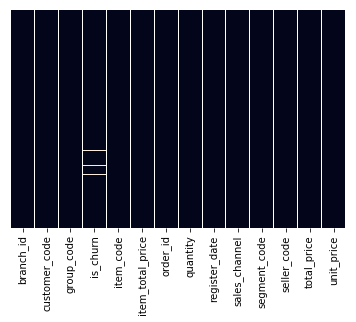

In [7]:
#Verificando nulos
sns.heatmap(sales.isna(), cbar=False, yticklabels=False);

In [8]:
sales.isna().sum()

branch_id              0
customer_code          0
group_code             0
is_churn            1915
item_code              0
item_total_price       0
order_id               0
quantity               0
register_date          0
sales_channel          0
segment_code           0
seller_code            0
total_price            0
unit_price             0
dtype: int64

In [9]:
sales[sales['is_churn'].isna()].nunique()

branch_id              1
customer_code         20
group_code             1
is_churn               0
item_code            390
item_total_price    1685
order_id             238
quantity              46
register_date        209
sales_channel          6
segment_code           1
seller_code           25
total_price          235
unit_price          1355
dtype: int64

In [10]:
print(sales[sales['is_churn'].isna()]['segment_code'].value_counts())
print(sales[sales['is_churn'].isna()]['group_code'].value_counts())

7    1915
Name: segment_code, dtype: int64
3    1915
Name: group_code, dtype: int64


## Exploratory Data Analysis

Nesta parte do trabalho, as colunas do DataFrame são avaliadas para extrair insights do que a base possui de relevante para o entendimento e para a solução proposta do problema. As análises geradas dão um overview de todas as colunas, mas como neste caso os modelos escolhidos são para predição de churn, há o foco de apenas entender o que há na base e analisar a coluna churn em relação às demais e seguir para a predição. Os seguintes insights foram retirados da base:

- 24618 Pedidos
- 2981 Itens
- 838 Clientes
- 290 Vendedores 
- 106 Canais de Vendas
- 8 Segmentos de Cliente: 0,1,2,3,4,5,6,7
- 4 Grupos de Cliente: 0,1,2,3

- Os valores da base estão entre 4 de Janeiro de 2008 e 8 de Julho de 2018

- Tanto o volume de vendas quando o número de pedidos têm uma tendência de crescimento desde 2008 e picos de sasonalidade

- O valor de churn = 1 é maior em linhas de item-pedido com o código de grupo 2 e segmento 2 do que em outros grupos e segmentos

Diversas outras interpretações podem ser feitas do pairplot com as colunas segment_code, group_code, total_price, item_total_price, quantity, unit_price. Contudo, o objetivo é seguir para a criação dos modelos preditivos.  

In [11]:
# print('Vendedores:', len(sales['seller_code'].value_counts()) )
# print('Canais de Vendas:', len(sales['sales_channel'].value_counts()))
# print('Clientes:', len(sales['customer_code'].value_counts()))
# print('Pedidos:', len(sales['order_id'].value_counts()))
# print('Itens:', len(sales['item_code'].value_counts()))
# print('Grupos de Cliente:', len(sales['group_code'].value_counts()))
# print('Segmentos de Cliente:', len(sales['segment_code'].value_counts()))

# print(sales['group_code'].unique())
# print(sales['segment_code'].unique())

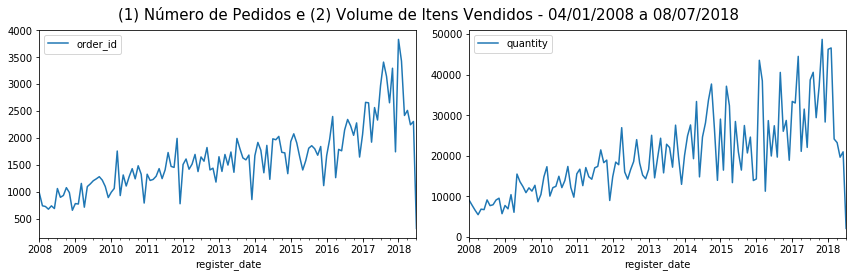

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
cols = ['customer_code', 'item_code', 'item_total_price', 'order_id', 'quantity', 'register_date', 'total_price']

sales_series = pd.DataFrame(data=sales, columns=cols)
sales_series.set_index('register_date', inplace=True)

#print(sales_series.index.max(),sales_series.index.min())
sales_series.resample('M')['order_id'].count().to_frame().plot(ax=ax1);
sales_series.resample('M')['quantity'].sum().to_frame().plot(ax=ax2);

fig.suptitle('(1) Número de Pedidos e (2) Volume de Itens Vendidos - 04/01/2008 a 08/07/2018', fontsize=15)

fig.tight_layout(rect=[0, 0.03, 1, 0.95]) 

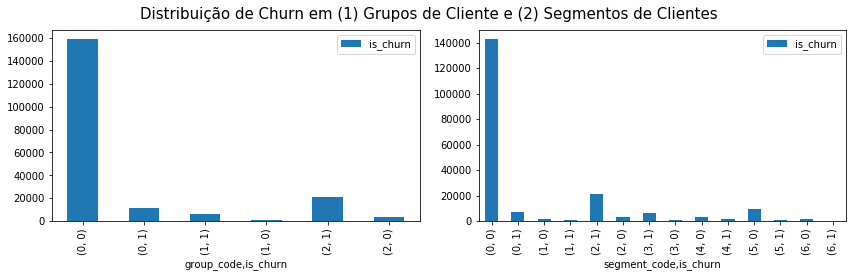

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
sales.groupby('group_code')['is_churn'].value_counts().to_frame().plot(kind='bar', ax=ax1)
sales.groupby('segment_code')['is_churn'].value_counts().to_frame().plot(kind='bar', ax=ax2)

fig.suptitle('Distribuição de Churn em (1) Grupos de Cliente e (2) Segmentos de Clientes', fontsize=15)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

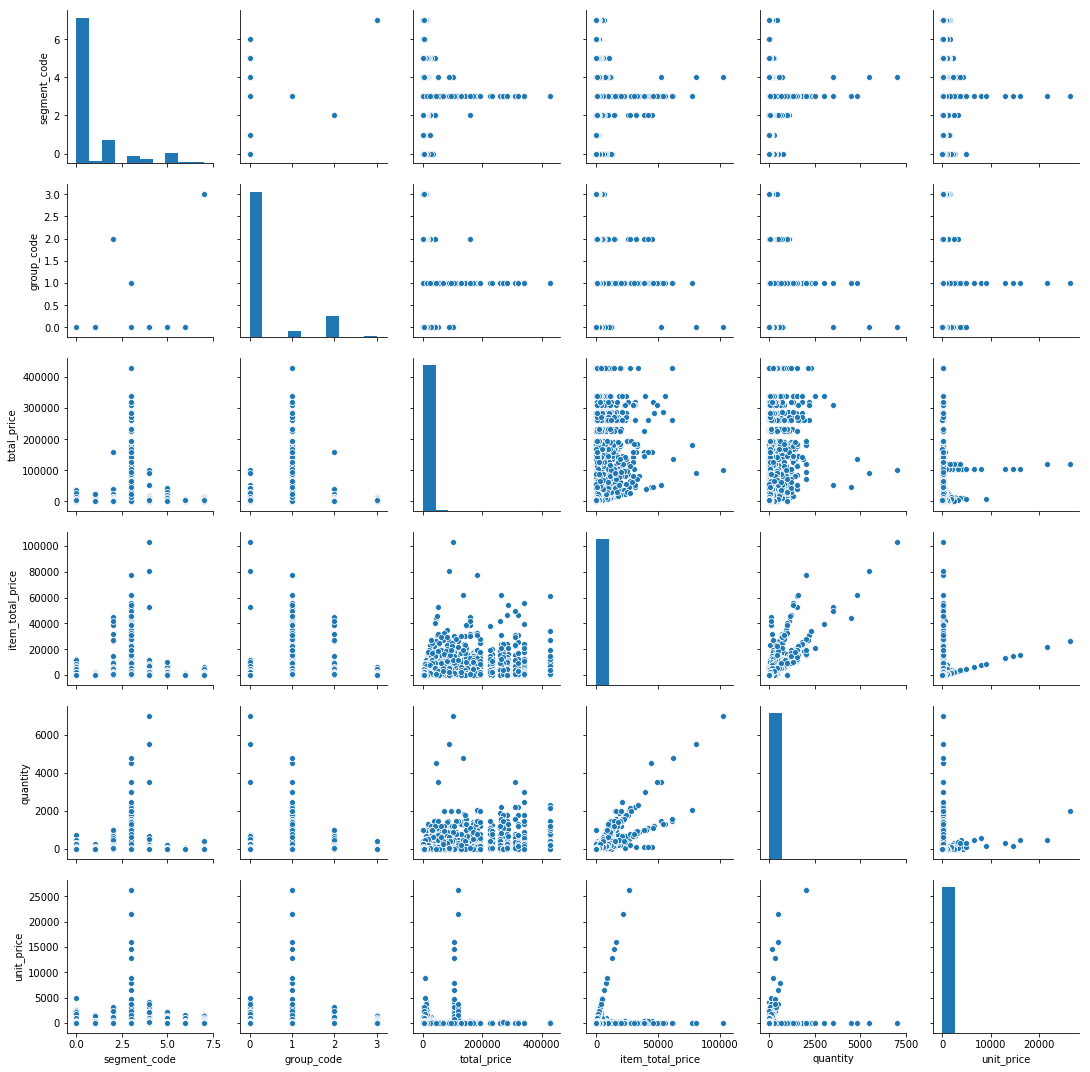

In [14]:
sns.pairplot(sales[['segment_code','group_code','total_price','item_total_price','quantity','unit_price']]);

## Feature Engineering

Os dados do data set serão agrupados por cliente antes da execução dos modelos. Este agrupamento irá agregar algumas colunas, mas outras colunas para novos features serão criadas para representar características dos clientes encontradadas na base. 

In [15]:
numerical_features = ['quantity', 'unit_price', 'total_price','item_total_price']
summary_features = ['register_date','customer_code' , 'is_churn','order_id']
features = summary_features + numerical_features

### Ponto de Atenção
- Segundo o PDF, total_item_price = quantity* item_price
- **Valores originais do JSON não são os mesmos, ou seja, total_item_price != quantity * item_price**
- Os valores item_total_price devem ser calculados com base no total_item_price, possivelmente refletindo as inconsistências
- Possivelmente total_item_price também tem suas peculiaridades no cálculo
- Não é possível afirmar se a inconsistência se encontra no quantity, item_price ou em algum passo desconhecido para o cálculo de total_item_price
- A diferença pode ocorrer por outros motivos, dentre eles a adição de margem por produto ou de imposto
- Não adotar nenhuma premissa para desenvolver o modelo que pode não ser a realidade dos dados ou que modifique os valores do data set original
- Possível passo desconhecido neste cálculo pode capturar características importantes dos dados para o modelo
- **Decisão: apesar de inconsistências, modelo seguirá utilizando os valores originais do data set**



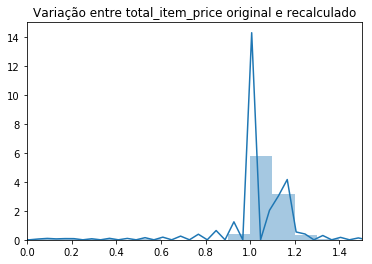

In [16]:
# Plotar a variação do calculado e original na base do item_total_price
customer = sales[features].sort_values(['customer_code','register_date'])
customer['total_item_price_recalculado'] = customer['quantity'] * customer['unit_price']

diff = pd.DataFrame(customer['item_total_price'] / customer['total_item_price_recalculado'])

title='Variação entre total_item_price original e recalculado'

sns.distplot(diff)
plt.title(title)
plt.xlim(0,1.5);

O primeiro grupo de features vem de uma agregação por clientes e tem relação com informações e valores do pedido. Uma vez que as informações da base se encontram nos níveis de pedido, produto e data, é necessário **agregar os valores por cliente** para que o modelo de predição de churn possa ser desenvolvido. 

Os dados foram transformados da seguinte maneira para cada linha de cliente:

- **customer_code** - identificador do cliente
- **is_churn** - identificador de churn, sendo 1 para 'churn' e 0 para 'not churn'
- **avg_unit_price** - utiliza a média do preço de cada unidade do item nos pedidos do cliente
- **avg_quantity** - utiliza a média de quantidade de itens solicitada nos pedidos do cliente
- **avg_item_total_price** - utiliza a média de preço pago por uma quantidade de itens (item_total_price) nos pedidos do cliente
- **avg_total_price** - utiliza a média de total_price, representando a média de preço dos pedidos do cliente 
- **count_order** - conta o número de order_id e identifica quantas orders possui cada cliente

In [17]:
cols_entrada = ['customer_code',
               'is_churn',
               'unit_price',
               'quantity',
               'item_total_price',
               'total_price',
               'order_id']

dic_agg = {'is_churn': 'first',
           'item_total_price': 'mean',
           'unit_price': 'mean',
           'quantity': 'mean',
           'total_price': 'mean',
           'order_id': 'count'}

agg_customer = customer[cols_entrada].groupby('customer_code').agg(dic_agg)

In [18]:
agg_customer.rename(columns={ 'unit_price': 'avg_unit_price',
                              'item_total_price': 'avg_item_total_price',
                               'order_id': 'count_order',
                                'quantity':'avg_quantity',
                                'total_price':'avg_total_price'}, inplace=True)

O segundo grupo de features reflete valores da data sobre o cliente. Não há informações do perfil do cliente, como a idade. Com base na data do primeiro e último pedidos e uma comparação com a data final do data set é possível chegar em alguns features de data.

Os dados foram transformados da seguinte maneira para cada linha de cliente:

- **first_interaction** - é a quantidade de dias desde a primeira interação do cliente até a última data disponível do data set todo. Basicamente há quantos dias o cliente está nesta base.
- **last_interaction** - é a quantidade de dias da diferença entre a data final e a última data em que o cliente teve um pedido. Basicamente há quantos dias o cliente não faz um pedido. 

O terceiro grupo de features busca informações dos itens procurados por cada cliente. Para cada pedido, o cliente recebeu uma cesta de um tipo de item ou mais itens diferentes. É possível também saber qual foi a cesta de itens distintos pedidas pelo cliente em seu último pedido.  

- **distinct_items** - número de itens diferentes que o cliente pediu ao longo do tempo
- **last_order_items** - número de itens diferentes do último pedido feito pelo cliente

In [19]:
final_date = sales['register_date'].max()
customers_dates = sales.groupby('customer_code', sort=True)['register_date'].agg(['min', 'max'])

In [20]:
agg_customer['first_interaction'] = (final_date - customers_dates['min']).dt.days
agg_customer['last_interaction'] = (final_date - customers_dates['max']).dt.days

In [21]:
agg_customer['group_code'] = sales.groupby('customer_code', sort=True)['group_code'].agg(['last'])
agg_customer['segment_code'] = sales.groupby('customer_code', sort=True)['segment_code'].agg(['last'])

In [22]:
customer_items = sales.groupby('customer_code', sort=True).agg({"item_code": lambda x: x.nunique()})
agg_customer['distinct_items'] = customer_items

In [23]:
itemcust_code = sales.groupby(['customer_code','register_date'])['item_code'].nunique().to_frame()
agg_customer['last_order_items'] = itemcust_code.groupby('customer_code').agg('last')

#### Matriz de Correlação

A matriz de correlação mostra qual feature está correlacionado com o outro. Alguns exemplos:
- **count_order** e **distinct_items** são **positivamente correlacionados** com 0.90 É provável que isso aconteça porque quanto mais pedidos o cliente tem, maior a chance de ele ter comprado itens diferentes.
- **avg_quantity** e **avg_total_item_price** são **positivamente correlacionados** com 0.75. É provável que isso aconteça porque o item_total_price é resultado de quantity * item_price. O mesmo ocorre com **avg_total_price** em relação a **avg_quantity** e **avg_total_item_price**.

Os modelos que serão utilizados não são sensíveis a correlação, logo essa análise é apenas para levantar mais informações sobre os features que entrarão no modelo. 


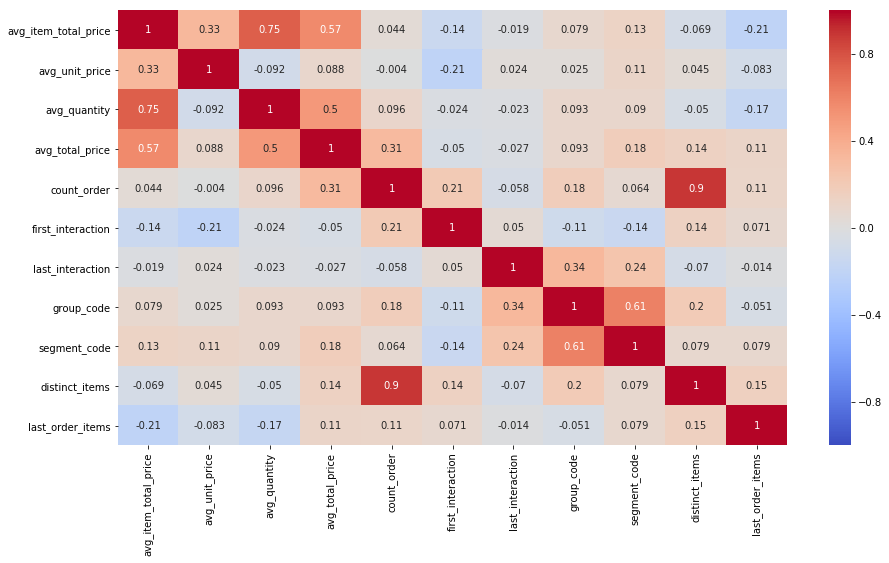

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(agg_customer.corr(), vmin=-1, cmap='coolwarm', annot=True);

O quarto grupo de features diz respeito a informações adicionais sobre o cliente, encontradas nas colunas de group_code e segment_code. Para este dado categórico é necessário gerar colunas dummies. 

As dummies geradas dos features categóricos servem para ajudar os modelos a entenderem que os números não significam uma ordem de importância, mas apenas de categorização. Ou seja, o group_code=1 não é necessariamente melhor ou mais importante que o  group_code=0, mas apenas uma categoria diferente de grupo de clientes. Os dummies são gerados com o drop_first=True com o objetivo de mitigar a multi-colinearidade de matrizes nos modelos. 

- **group_code** - grupo que o cliente pertence dividido em colunas dummies. 
- **segment_code** - segmento que o cliente pertence dividido em colunas dummies. 




In [25]:
group_dummies = pd.get_dummies(agg_customer['group_code'], prefix='group_code', drop_first=True)

agg_customer = pd.concat([agg_customer, group_dummies], axis=1, sort=False)
agg_customer.drop(columns='group_code', inplace=True)

In [26]:
segment_dummies = pd.get_dummies(agg_customer['segment_code'], prefix='segment_code', drop_first=True)

agg_customer = pd.concat([agg_customer, segment_dummies], axis=1, sort=False)
agg_customer.drop(columns='segment_code', inplace=True)
agg_customer.head()

,is_churn,avg_item_total_price,avg_unit_price,avg_quantity,avg_total_price,count_order,first_interaction,last_interaction,distinct_items,last_order_items,group_code_1,group_code_2,group_code_3,segment_code_1,segment_code_2,segment_code_3,segment_code_4,segment_code_5,segment_code_6,segment_code_7
customer_code,,,,,,,,,,,,,,,,,,,,
0,0,471.076369,67.850670,9.307263,4389.258436,179,3575,30,52,12,0,0,0,0,0,0,0,0,0,0
1,0,192.872654,54.524862,6.830149,2300.680764,471,3785,118,50,8,0,0,0,0,0,0,0,0,0,0
2,0,317.706743,48.270912,10.436482,2741.164300,307,3820,10,30,7,0,0,0,0,0,0,0,0,0,0
3,0,604.128283,78.777307,15.943307,8035.883764,635,3783,61,190,6,0,0,0,0,0,0,0,0,0,0
4,0,345.650797,39.980399,14.561462,3577.577608,301,3788,171,86,10,0,0,0,0,0,0,0,0,0,0


**É necessário eliminar clientes que não possuem is_churn preenchido**, ou seja, em que os valores são **nulos**. Não é interessante inserir valores nulos porque isso diminui as características da série que será modelada e inviabiliza a execução ou resultados do modelo.

Para os valores nulos, poderiam ser inputados dados com valor 0 ou 1, com respectivas argumentações para justificar as decisões. Porém, a decisão é de não assumir premissas que não estão na formulação do projeto e que podem não representar a realidade dos dados ou modificá-los. 

In [27]:
print(agg_customer.shape)
print(agg_customer.isna().sum())

(838, 20)
is_churn                20
avg_item_total_price     0
avg_unit_price           0
avg_quantity             0
avg_total_price          0
count_order              0
first_interaction        0
last_interaction         0
distinct_items           0
last_order_items         0
group_code_1             0
group_code_2             0
group_code_3             0
segment_code_1           0
segment_code_2           0
segment_code_3           0
segment_code_4           0
segment_code_5           0
segment_code_6           0
segment_code_7           0
dtype: int64


In [28]:
agg_customer_nulls = agg_customer[agg_customer['is_churn'].isna()]
agg_customer.dropna(inplace=True)

In [29]:
agg_customer['is_churn'] = agg_customer['is_churn'].astype(int)

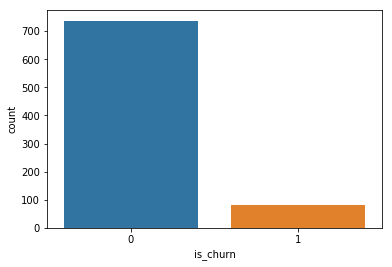

In [30]:
#print(len(agg_customer))
sns.countplot(agg_customer['is_churn']);
#round(agg_customer['is_churn'].value_counts()/len(agg_customer),2)

O data set original tem uma **distribuição de churn/not churn desequilibrada**. Ou seja, dentre os **818 clientes** cerca de **90% (737)** são classificados como **not churn** e **10% (81)** como **churn**. Com isto, há o risco de obter erros na predição, uma vez que modelos de classificação podem assumir que a maioria dos clientes é not churn.

Uma técnica seria igualar o tamanho da amostra, ou seja, pegar aleatoriamente 81 clientes not churn e juntá-los aos clientes churn e gerar modelos com a distribuição balanceada. Há um trade-off com este método: os modelos de classificação podem apresentar uma acurácia significativamente menor, uma vez que há perda de informação eliminando 656 clientes. Praticando o 'Under-Sampling', o número total de clientes também seria reduzido para 162. A amostra de clientes já não é tão grande, portanto reduzi-la não é o ideal neste momento. 

A decisão para este caso é **manter a distribuição como ela veio nos dados originais**. 

Há um ponto de atenção: **se o modelo prever que 90% dos casos são not churn, ele tem 90% de chances de acertar. Logo buscamos uma acurácia superior a 90% e sempre olhando para a matriz de confusão, para garantir que o modelo acertou casos de churn e minimizou erros tipo 1 e 2.**

- **Erro tipo 1** significa que houve um falso positivo: **um cliente not churn foi classificado como churn.**
- **Erro tipo 2** significa que houve um falso negativo: **um cliente churn foi classificado como not churn.**

## Regressão Logística

Aqui é utilizado um algoritmo de regressão logística para predição dos valores da variável categórica is_churn de clientes. O modelo tem como base um conjunto de observações montado no DataFrame exibido anteriormente, que contêm as demais variáveis explicativas.

#### Divisão de train/test, treino e predição
- Os dados são divididos em um **conjunto de treinamento e um conjunto de testes**, este último de 20% do tamanho do data set.
- Em seguida o **fitting com os conjuntos de treino é realizado**. Fitting é uma medida de quão bem o modelo pode ser generalizado para dados semelhantes. Neste caso, a partir dos dados de treino tentaremos prever is_churn para os dados de teste. Um modelo é bom se produz resultados mais precisos na sua predição. Um modelo é overfitted se produz resultados ajustados demais para os dados e underfitted se não ajusta adequadamente aos dados. 
- Em seguida o modelo é utilizado para tentar prever os valores de is_churn para o **conjunto de testes**. 

#### Matriz de Confusão
- A matriz de confusão indica como o modelo classificou is_churn comparando com o valor de is_churn real para os dados teste.
- No geral, o modelo classifica muito bem quem é not churn, o que já é esperado acontecer e não diz muito sobre o poder preditivo do modelo.
- **É possível também argumentar qual tipo de erro traz menos problemas para o negócio. No caso do tipo 2, cliente perdidos são classificados como não perdidos. A empresa não saberia que perdeu o cliente e não faria nenhuma ação para reverter a situação, ocasionando na perda definitiva do cliente e em menos vendas. Nesta linha de argumentação, erros tipo 2 precisam ser minimizado no modelo.**  
- A atenção deve ser focada para a predição de churn corretas e para os erros de Tipo 1 e 2: o modelo ideal acerta mais predições de clientes churn e comete menos erros.

#### Demais Avaliações
- **A acurácia não deve ser o único indicativo se o modelo funcionou**. Como citado antes, o modelo tem o viés de classificar todos como not churn e assim obter uma acurácia grande. Podemos verificar outras métricas usando o relatório de classificação.
- Como cada conjunto de treino e teste contém um grupo de clientes diferentes, o modelo pode variar de acurácia e valores na matriz de confusão depois de cada execução. Isso também ocorrer também por causa da baixa quantidade de clientes na base de dados. 
- **10000 iterações foram realizadas com o modelo para determinar um valor médio de acurácia e faixas onde o intervalo de confiança é mais alto**. 
- O número de iterações foi reduzido para evitar tempo alto de execução. **Os gráficos de distribuição e boxplot exibidos abaixo são de imagens salvas previamente**. 
- Para simplificar a interpretação dos resultados, um seed foi inserido no código, gerando sempre o mesmo grupo de testes e treino e assim gerando uma matriz de confusão sempre com os mesmos valores. 

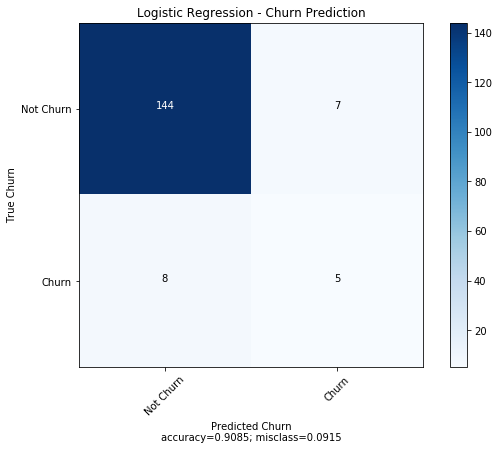

In [31]:
i=0
accuracy_logmodel=[]
auc_mean_log =[]

#Valor anterior realizado para 10000
while i < 1:
    Xl_train, Xl_test, yl_train, yl_test = train_test_split(agg_customer.drop('is_churn',axis=1), 
                                                        agg_customer['is_churn'], test_size=0.20, random_state=10)
    logmodel = LogisticRegression()
    logmodel.fit(Xl_train,yl_train)

    predictions_log = logmodel.predict(Xl_test)

    accuracy_logmodel.append(accuracy_score(yl_test, predictions_log))
    
    auc_mean_log.append(roc_auc_score(predictions_log.astype(int),yl_test.astype(int)))
    
    i+=1
    
plot_confusion_matrix(cm=confusion_matrix(yl_test,predictions_log), 
                          normalize    = False,
                          target_names = ['Not Churn', 'Churn'],
                          title = 'Logistic Regression - Churn Prediction')   

In [32]:
# Código usado para gerar gráficos
# fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

# print('O valor de acurácia médio é:', pd.DataFrame(list(accuracy_logmodel)).mean()[0])

# sns.distplot(pd.DataFrame(list(accuracy_logmodel)), ax=ax1);
# sns.boxplot(pd.DataFrame(list(accuracy_logmodel)), ax=ax2);

# plt.savefig('reglog_09290_plots')


- **Valor de Acurácia Médio para Regressão Logística: 0.9290**
- Quantidade de Conjuntos de Treino/Testes Realizados: 10000

![Graph](reglog_09290_plots.png)

In [33]:
# Relatório de Classificação
print(classification_report(yl_test,predictions_log))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       151
           1       0.42      0.38      0.40        13

   micro avg       0.91      0.91      0.91       164
   macro avg       0.68      0.67      0.68       164
weighted avg       0.91      0.91      0.91       164



In [34]:
logmodel.coef_[0]
agg_customer.columns[1:]

coef = pd.DataFrame(logmodel.coef_[0], agg_customer.columns[1:], columns=['Coefficient'])

In [35]:
coef.loc[coef['Coefficient'] > 0, 'Sinal Encontrado'] = 'Positivo - aumenta a chance de 1 - churn'
coef.loc[coef['Coefficient'] < 0, 'Sinal Encontrado'] = 'Negativo - aumenta a chande de 0 - not churn'
coef.rename(columns={'Sinal':'Sinal Encontrado'})
coef.drop(columns='Coefficient', inplace=True)

#### Insights dos Coeficientes da Regressão Logística

Os coeficientes gerados pela regressão logística podem ser interpretados baseado nos sinais que apresentam. Cada coeficiente está relacionado a um feature que entrou no modelo, possuindo um valor positivo maior que zero ou negativo menor que zero. 

- Caso **sinal positivo**, indica que quanto maior o valor do feature, maior a influência dele na probabilidade do is_churn ser 1 (churn).
- Caso **sinal negativo**, indica que quanto maior o valor do feature, maior a influência dele na probabilidade do is_churn ser 0 (not churn).

Nos trechos gerados pelo código abaixo é possível identificar quais features apresentaram valor positivo e valor negativo. Estas relações são identificadas pela regressão logística com base nos dados. Argumentar o porque as relação com determinado feature pode ser negativa ou positiva na vida real depende muito das características do negócio, muitas delas que não estão explícitas na base.  

In [36]:
print(coef[(coef['Sinal Encontrado'].isna()==False)&(coef['Sinal Encontrado'].str.startswith('Positivo'))])

                                          Sinal Encontrado
avg_unit_price    Positivo - aumenta a chance de 1 - churn
avg_quantity      Positivo - aumenta a chance de 1 - churn
avg_total_price   Positivo - aumenta a chance de 1 - churn
count_order       Positivo - aumenta a chance de 1 - churn
last_interaction  Positivo - aumenta a chance de 1 - churn
segment_code_1    Positivo - aumenta a chance de 1 - churn
segment_code_4    Positivo - aumenta a chance de 1 - churn


In [37]:
print(coef[(coef['Sinal Encontrado'].isna()==False)&(coef['Sinal Encontrado'].str.startswith('Negativo'))])

                                                  Sinal Encontrado
avg_item_total_price  Negativo - aumenta a chande de 0 - not churn
first_interaction     Negativo - aumenta a chande de 0 - not churn
distinct_items        Negativo - aumenta a chande de 0 - not churn
last_order_items      Negativo - aumenta a chande de 0 - not churn
group_code_1          Negativo - aumenta a chande de 0 - not churn
group_code_2          Negativo - aumenta a chande de 0 - not churn
segment_code_2        Negativo - aumenta a chande de 0 - not churn
segment_code_3        Negativo - aumenta a chande de 0 - not churn
segment_code_5        Negativo - aumenta a chande de 0 - not churn
segment_code_6        Negativo - aumenta a chande de 0 - not churn


## XGBoost

XGBoost ou eXtreme Gradient Boosting é uma **implementação de árvores de decisão com aumento de gradiente**, criada com objetivos de velocidade e desempenho. Este algoritmo é **geralmente aplicado em datasets tabulares para modelagem preditiva de problemas de regressão e classificação**, com bons resultados e em um tempo de execução aceitável. 

A divisão de train/test, o treino e predição são realizados de maneira semelhante a regressão logística. 

A matriz de confusão foi gerada com um seed fixo, para que o mesmo valor seja avaliado e facilitar a interpretação. 

Para gerar a distribuição de acurácia e valor de acurácia médio, o modelo foi iterado 10000 vezes e os gráficos foram salvos como imagem. O código atual executa o modelo apenas uma vez para evitar um tempo de execução alto. 

#### Matriz de Confusão
- Seguindo a mesma lógica da matriz de confusão da regressão logística, podemos notar pelas visualizações que os resultados com XGBoost são ligeiramente melhores em mitigar erros tipo 1 e 2 e em classificar corretamente casos de churn. 
- A **Acurácia Média é maior, atingindo o valor de 96% contra 92% da regressão logística**. Isso indica que no quesito acurácia o modelo utilizando XGBoost tem um desempenho melhor. 



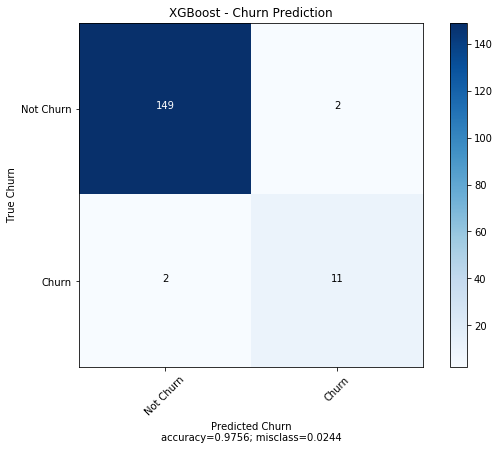

In [38]:
i=0
accuracy_xgb =[]
auc_mean = []
#Valor anterior realizado para 10000
while i < 1:
    X_train, X_test, y_train, y_test = train_test_split(agg_customer.drop('is_churn',axis=1), 
                                                            agg_customer['is_churn'], test_size=0.20, random_state=10)
    xgboost = XGBClassifier()
    xgboost.fit(X_train,y_train)

    predictions = np.array(xgboost.predict(X_test))
    accuracy_xgb.append(accuracy_score(y_test, predictions))
    
    auc_mean.append(roc_auc_score(predictions.astype(int),y_test.astype(int)))
    
    i+=1

plot_confusion_matrix(cm=confusion_matrix(y_test,predictions), 
                              normalize    = False,
                              target_names = ['Not Churn', 'Churn'],
                              title = 'XGBoost - Churn Prediction')    

In [39]:
# fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

# print('O valor de acurácia médio é:', pd.DataFrame(list(accuracy_xgb)).mean()[0])

# sns.distplot(pd.DataFrame(list(accuracy_xgb)), ax=ax1);
# sns.boxplot(pd.DataFrame(list(accuracy_xgb)), ax=ax2);

# plt.savefig('xgb_09598_plots')

- **Valor de Acurácia Médio para XGBoost: 0.9598**
- Quantidade de Conjuntos de Treino/Testes Realizados: 10000
![Graph](xgb_09598_plots.png)

- Ponto de atenção: no boxplot é possível observar um resultado=1, indicando 100% de acurácia. Este resultado provavelmente vem de um conjunto de teste onde todos os clientes são is_churn=0, por isso a acurácia é perfeita. 

#### Importância dos Features no Modelo

É possível plotar a **importância de cada feature dentro do modelo aplicado pelo XGBoost** para predizer a variável de churn. 
Essa classificação, chamada de **F Score**, pode ser feita utilizando três métodos que elegem quais são os features mais importantes para o modelo. 

Os métodos podem ser resumidos da seguinte maneira:
- **Weight** - O número de vezes que um feature é usado para dividir os dados em todas as árvores. É o valor default do método plot_importance. 
- **Cover** - Utiliza a mesma técnica anterior, mas pondera pelo número de pontos de dados de treinamento que passam por essas divisões.
- **Gain**. O valor médio de training loss reduction obtido quando o feature é utilizado para dividir dados em uma árvore

Os features mais importantes nas três primeiras posições de cada método são listados aqui ou também podem ser analisados no set de três gráficos abaixo. 
- **last_interaction**
- **firs_interaction**
- **count_order**
- **distinct_items**
- **avg_quantity**


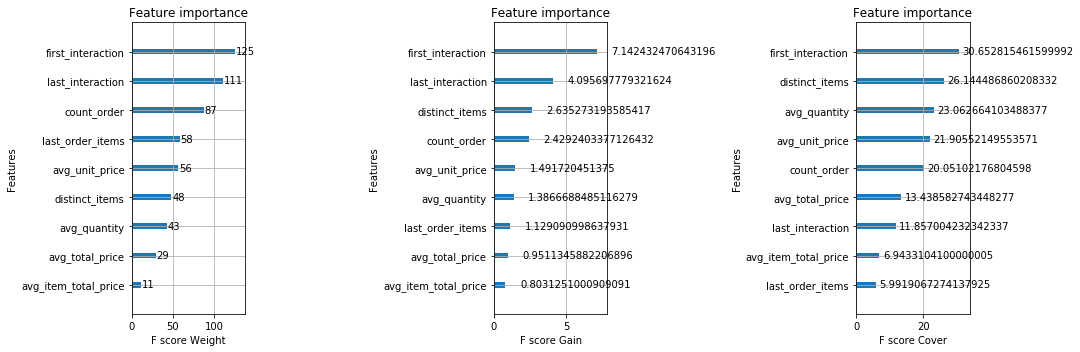

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))

xgb.plot_importance(xgboost, max_num_features = 15, ax=ax1, xlabel='F score Weight')
xgb.plot_importance(xgboost, max_num_features = 15, importance_type = 'gain', ax=ax2, xlabel='F score Gain')
xgb.plot_importance(xgboost, max_num_features = 15, importance_type = 'cover', ax=ax3, xlabel='F score Cover');

plt.tight_layout()


É possível também gerar a **importância das variáveis** considerando um outro **método/biblioteca chamada shap**. A classificação de importância com este método está no gráfico abaixo. 
 

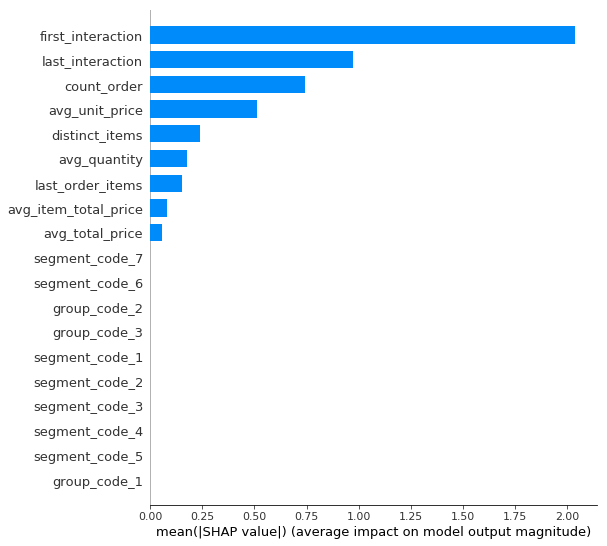

In [41]:
shap_values = shap.TreeExplainer(xgboost).shap_values(agg_customer.drop('is_churn',axis=1))
shap.summary_plot(shap_values, agg_customer.drop('is_churn',axis=1), plot_type="bar")

O approach shap também oferece uma visualização interessante sobre como cada feature impacta no modelo e quais valores impactam no resultado is_churn=0 ou is_churn=1.

Cada feature é representado no gráfico por uma linha no eixo y ordenados pelo feature de maior importância. A posição de cada ponto no plano representa o impacto do feature no modelo de predição. A cor representa o valor daquele feature. Pontos que não cabem na linha são empilhados para aumentar a densidade. 

A interpretação pode ser feita da seguinte maneira, para o exemplo do feature **first_interaction**:
- **Os pontos em vermelho são os valores mais altos e significam clientes mais velhos no data set**
- **Os pontos em azul são os valores mais baixos e significam clientes mais novos no data set**
- **Pontos em vermelho *_tendem_* a ter um impacto (shap value) negativo no modelo, ou seja, influenciam para que o is_churn seja igual a 0**
- **Pontos em azul *_tendem_* a ter um impacto (shap value) positivo no modelo, ou seja, influenciam para que o is_churn seja igual a 1**


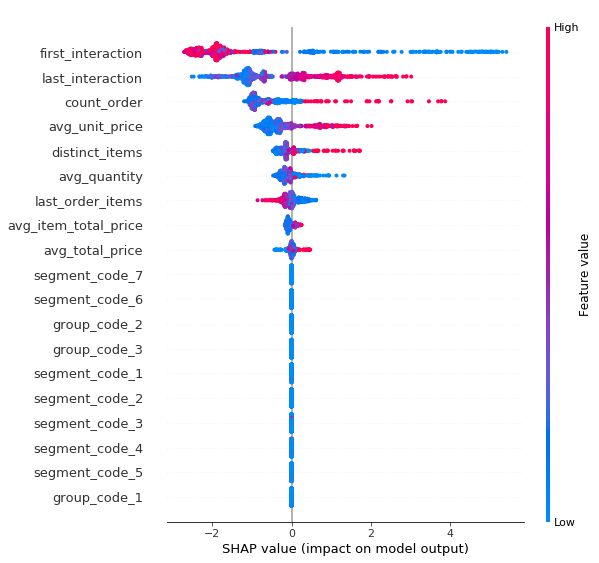

In [42]:
shap.summary_plot(shap_values, agg_customer.drop('is_churn',axis=1))

Nos próximos gráficos também é possível analisar cada caso para ter insights sobre como cada feature está influenciando na classificação de churns. 
- O **shap base value é -2.9,** indicando que o **modelo tende a classificar clientes como is_churn=0**. 
- O **tamanho da barra** de cada feature indica o **impacto dele no shap output value**, para mais ou menos.

#### Exemplo  Cliente 60 -  is_churn = 0
- Os features em azul trazem o shap output value para valores menores que o shap base value.
- Os features em vermelho agem com o efeito oposto e influenciam para que o output value seja maior, sem sucesso neste caso. 
- **Com output value de -6.89, o cliente é classificado pelo modelo como is_churn=0**

#### Exemplo  Cliente 61 -  is_churn = 1
- Os features em vermelho indicam um impacto positivo no shap output value.
- Os features em azul ifluenciam para que o shap output value seja menor, mas sem sucesso neste caso.
- **Com output value de 1.01, o cliente é classificado pelo modelo como is_churn=1**


In [43]:
#Teste customer_code = 60  - Not Churn
explainer = shap.TreeExplainer(xgboost)
shap_values = explainer.shap_values(agg_customer.drop('is_churn',axis=1))
shap.force_plot(explainer.expected_value, shap_values[59,:], agg_customer.drop('is_churn',axis=1).iloc[59])

In [44]:
#Teste customer_code = 61 - Churn
explainer = shap.TreeExplainer(xgboost)
shap_values = explainer.shap_values(agg_customer.drop('is_churn',axis=1))
shap.force_plot(explainer.expected_value, shap_values[60,:], agg_customer.drop('is_churn',axis=1).iloc[60])

In [45]:
# Casos na base
agg_customer.iloc[59:61]

,is_churn,avg_item_total_price,avg_unit_price,avg_quantity,avg_total_price,count_order,first_interaction,last_interaction,distinct_items,last_order_items,group_code_1,group_code_2,group_code_3,segment_code_1,segment_code_2,segment_code_3,segment_code_4,segment_code_5,segment_code_6,segment_code_7
customer_code,,,,,,,,,,,,,,,,,,,,
60,0,219.290127,73.336203,9.379747,2542.604557,79,1553,52,35,6,0,0,0,0,0,0,0,0,0,0
61,1,671.493125,24.447500,30.645833,7776.436250,48,135,66,21,3,1,0,0,0,0,1,0,0,0,0


## Comparação de Resultados dos  Modelos 

Os modelos já foram comparados pela acurácia, com 92% para regressão logística e 96% para XGBoost. O objetivo desta parte do trabalho é avaliar outras métricas que indicam o quanto os modelos estão acertando na predição de churn. 

#### ROC Curve e TPR/FPR

A **curva Receiver Operator Characteristic (ROC)** é um gráfico utilizado para mostrar a **eficácia de modelos de classificação**. A **área do gráfico abaixo da linha é denominada de AUC** e expresa como uma **probabilidade**. Quanto mais alto o AUC, maior a probabilidade de o modelo estar prevendo todos valores 0 como 0 e valores 1 como 1.

A intenção é ter modelos que não apresentem erros tipo 1 e 2, logo gerar a curva ROC dá insights sobre o quanto os modelos estão acertando. 

A curva ROC é desenhada baseada na TPR e FPR, onde **TPR está no eixo y** e **FPR está no eixo x**.

**TPR - True Positive Rate**
- Medida da proporção de casos positivos nos dados que são corretamente identificados como positivos
- Expressado por **TPR = True Positive / True Positive + False Negative**

**FPR - False Positive Rate**
- Medida da proporção de casos negativos identificados incorretamente como casos positivos nos dados 
- Expressado por **FPR = False Positive / False Positive + True Negative**

#### Avaliação

- A AUC varia conforme as diferentes amostras de teste/treino, mas de maneira geral **XGBoost apresenta AUCs mais altos**
- A **diferença também pode ser verifica no gráfico de curva ROC** para as predições dos dois modelos realizada anteriormente e vistas na matriz de confusão
- Foram geradas 10000 iterações dos dois modelos para plotar os gráficos (salvos em imagens) de distribuição e boxplots das variáveis AUC
- O número de iterações foi reduzido e um seed foi inserido no código para evitar tempo alto de execução e garantir que o mesmo resultado seja exibido na matriz de confusão e na curva ROC.
- **AUC Médio para XGBoost de 91% é maior contra o AUC Médio da Regressão Logística de 82%.**






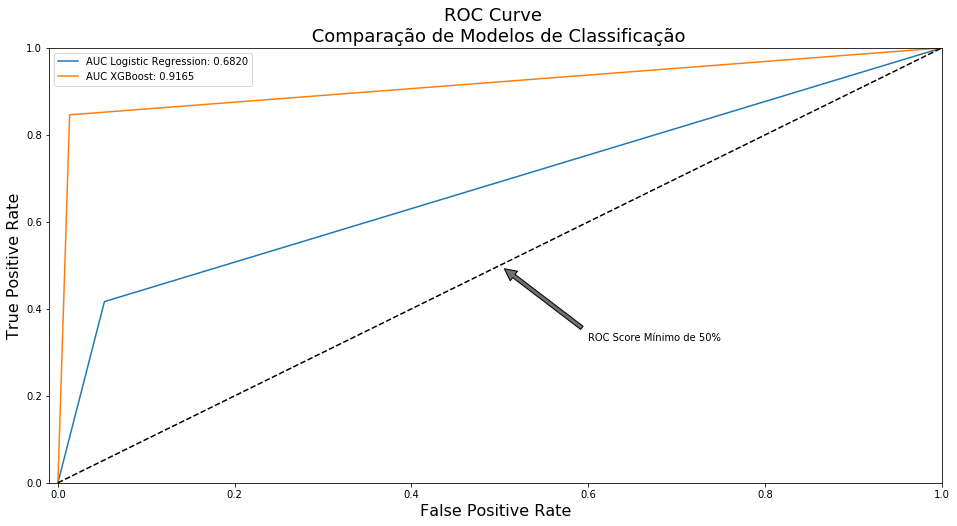

In [46]:
fprl, tprl,_=roc_curve(predictions_log.astype(int),yl_test.astype(int),drop_intermediate=False)
fpr, tpr,_=roc_curve(predictions.astype(int),y_test.astype(int),drop_intermediate=False)


def graph_roc_curve_multiple(log_fpr, log_tpr, xgb_fpr, xgb_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Comparação de Modelos de Classificação', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='AUC Logistic Regression: {:.4f}'.format(auc_mean_log[-1]))
    plt.plot(xgb_fpr, xgb_tpr, label='AUC XGBoost: {:.4f}'.format(auc_mean[-1]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC Score Mínimo de 50% \n', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(fprl, tprl, fpr, tpr)
plt.show()

- **Valor de AUC Médio para Regressão Logística: 0.8269**
- Quantidade de Conjuntos de Treino/Testes Realizados: 10000
![Graph](auc_reglog_08269.png)

- **Valor de AUC Médio para XGBoost: 0.9170**
- Quantidade de Conjuntos de Treino/Testes Realizados: 10000
![Graph](auc_xgb_09170.png)

In [47]:
#Código para plotar cruva ROC para Reg. Logística individualmente

# plt.plot(fprl, tprl, color='red',
#  lw=2, label='ROC curve')

# plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

# plt.xlabel('FPR')
# plt.ylabel('TPR')
# plt.title('ROC Curve - Regressão Logística')
# plt.show()

# print('AUC ou área abaixo da curva:', round(auc_mean_log[-1],2))
# print('TPR:', round(tprl[1],2))
# print('FPR:', round(fprl[1],2))

In [48]:
# Código para plotar curva ROC para XGB individualmente

# plt.plot(fpr, tpr, color='red',
#  lw=2, label='ROC curve')

# plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

# plt.xlabel('FPR')
# plt.ylabel('TPR')
# plt.title('ROC curve - XGBoost')
# plt.show()

# print('AUC ou área abaixo da curva:', round(auc_mean[-1],2))
# print('TPR:', round(tpr[1],2))
# print('FPR:', round(fpr[1],2))

In [49]:
# Código para plotar distribuição e boxplot e salvá-los em imagem

# fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
# sns.distplot(auc_mean_log, ax=ax1)
# sns.boxplot(auc_mean_log, ax=ax2);

# pd.DataFrame(auc_mean_log).mean()
# plt.savefig('auc_reglog_08269')

# fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
# sns.distplot(auc_mean, ax=ax1)
# sns.boxplot(auc_mean, ax=ax2);

# pd.DataFrame(auc_mean).mean()
# plt.savefig('auc_xgb_09170')

## Prevendo Casos Nulos da Base

- A base original possui **linhas com valor de is_churn = Null**
- É possível utilizar o modelo do XGBoost neste data set de nulos para **prever o valor de is_churn destes clientes**
- Não é possível saber se os valores previstos estão corretos, mas sabendo das características mais importantes para o modelo é possível analisar caso a caso para ter insights e auditar como o modelo trabalhou na predição

5 features mais importantes do modelo (método Shap) ordenados por importância e como afetam no modelo: 
1. **first_interaction** - valor baixo tende a influenciar para 1
2. **last_interaction** - valor alto tende a influenciar para 1
3. **count_order** - valor alto tende a influenciar para 1
4. **avg_unit_price** - valor alto tende a influenciar para 1
5. **distinct_items** - valor alto tende a influenciar para 1

Abaixo há também gráficos com a avaliação de casos previstos, como churn para o cliente 319 e not churn para o cliente 313

In [50]:
agg_customer_nulls.drop('is_churn',axis=1, inplace=True)
predictions_nullstest = np.array(xgboost.predict(agg_customer_nulls)) 
agg_customer_nulls.insert(loc=0, column='is_churn_predicted', value=predictions_nullstest)

In [51]:
# Clientes na base e valor de is_churn previsto
agg_customer_nulls.iloc[6:8]

,is_churn_predicted,avg_item_total_price,avg_unit_price,avg_quantity,avg_total_price,count_order,first_interaction,last_interaction,distinct_items,last_order_items,group_code_1,group_code_2,group_code_3,segment_code_1,segment_code_2,segment_code_3,segment_code_4,segment_code_5,segment_code_6,segment_code_7
customer_code,,,,,,,,,,,,,,,,,,,,
313,0,1072.779726,26.219863,52.945205,9017.282877,73,495,101,18,8,0,0,1,0,0,0,0,0,0,1
319,1,64.381429,40.827727,2.480519,318.173247,154,394,160,94,5,0,0,1,0,0,0,0,0,0,1


In [52]:
# Cliente 313 - Not Churn
explainer = shap.TreeExplainer(xgboost)
shap_values = explainer.shap_values(agg_customer_nulls.drop('is_churn_predicted',axis=1))
shap.force_plot(explainer.expected_value, shap_values[6,:], agg_customer_nulls.drop('is_churn_predicted',axis=1).iloc[6])

In [53]:
# Cliente 319 - Churn
shap.force_plot(explainer.expected_value, shap_values[7,:], agg_customer_nulls.drop('is_churn_predicted',axis=1).iloc[7])

#### Question 4 (60 Points)
#### A. Explain each and every of your design choices, you can use jupyter notebooks. (e.g., preprocessing, model selection, hyper parameters, evaluation criteria). Compare and contrast your choices with alternative methodologies.
#### B. Describe how you would improve the model in Question 3 if you had more time.

### - Feature Engineering

Ainda é possível gerar novos features a partir das informações do data set para inserir no modelo e testar o quanto eles influenciam na predição de churn. Segue uma lista de features e uma breve descrição do processo para obtê-los:

#### Grupo de Produtos 

Informações dos produtos foram inseridos através dos features distinct_items e last_order_items, porém há um outro caminho para considerar os produtos que o cliente consome. 

Através de colunas como item_code, unit_price e quantity, é possível gerar uma **clusterização dos produtos com K-Means**. As novas **classes de produtos** seriam associadas ao DataFrame do cliente através de colunas dummies, com valores preenchidos caso ele tenha consumido produtos daquela classe. Com isso seria possível testar se determinadas classes de produto influenciam nas decisões do modelo. 

#### Número de Vendedores Distintos 

Semelhante aos features de produtos distintos, o número de vendedores (seller_code) distintos é o quantidade de vendedores diferentes que interagiram com o cliente desde seu primeiro pedido na base. 

#### Número de Sales Channel Distintos 

Semelhante aos features anterior mas para sales_channel. Representa quantos sales_channel diferentes o cliente utilizou para realizar seus pedidos. 

#### Variação de Preço Total dos Itens e Preço Total do Pedido 
Conforme citado anteriormente, há uma diferença na base, onde o total_item_price != quantity* item_price. Várias hipóteses podem ser levantadas sobre o motivo. A causa pode ser uma margem aplicada sobre o produto, imposto ou simplesmente uma inconsistência na base. É possível tirar a diferença entre os valores calculados e os valores encontrados na base, tanto para o preço total dos itens, quanto para o preço total dos pedidos - este último potencialmente apresenta valores diferentes também. O novo feature proposto seria uma **média de variação entre os valores calculados e valores encontrados na base, por cliente**. 


### - Mudança de Features e Novos Testes

Verificando o modelo desenvolvido XGBoost, vemos que as variáveis categóricas de grupo e segmento de cliente tem influência quase nula no resultado da predição do modelo. Logo, **novos testes podem ser realizados com uma mudança nos features**, de maneira a excluir os features que influenciam menos nos modelos e potencialmente obter melhores resultados de acurácia e na matriz de confusão. 

### - imbalanced-learn

Conforme citado antes, os modelos tendem a prever clientes com is_churn=0 porque na distribuição dos casos 90% dos clientes tem essa classificação. Em outras palavras, com uma distribuição desequilibrada, o modelo favorece a classe com maior número de amostras. Para tentar contornar esse problema, existe uma biblioteca chamada imbalanced-learn que oferece **técnicas de resampling**. 

Uma das ideias seria explorar as técnicas desta biblioteca para trabalhar com distribuições mais balanceadas e possivelmente obter resultados melhores. Seria inicialmente ideal utilizar a técnica de undersampling - prototype selection para os casos de is_churn=0, não modificando os dados existentes is_churn=1 e alterando somente a classe que já tem mais amostras. 

Basicamente estas técnicas agem de duas maneiras: 

- **Oversampling**: técnicas que **aumentam o número de amostras da variável que está menos representada** na base. 
A técnica RandomOverSampler duplica algumas das amostras originais da classe minoritária. As técnicas SMOTE e ADASYN geram novas amostras por interpolação. 

- **Undersampling**: técnicas que **diminuem o número de amostras da variável que está mais representada** na base. 
Prototype generation utiliza K-means para reduzir o número  de amostras a partir da geração de novas amostras.  Algoritmos de prototype selection fazem a redução utilizando somente amostras já existentes.  


### - Clustering de Clientes
Existem diversos algoritmos de clusterização que buscam avaliar a amostra calculando a distância entre os pontos observados, de maneira que estes pontos possam ser exibidos em um plano. O objetivo é buscar pontos semelhantes que agrupados representam um cluster. 

O objetivo de explorar outros algoritmos de clusterização seria para tentar **definir um cluster de clientes is_churn=0 e outro cluster para clientes is_churn=1** e quais as **características que determinam a separação** deles. Existem diversos algoritmos de clusterização, como K-means já citado anteriormente. 

Abaixo há um exemplo de algoritmo com t-SNE, que na verdade é um algoritmo para redução de dimensionalidade (como o PCA). Após a execução deste algoritmo já é possível perceber que as observações podem ser dividas em dois clusters de Churn e Not Churn, que apesar de não serem perfeitos, já indicam que os clientes podem ser agrupados de alguma forma com base nas características explicativas. 

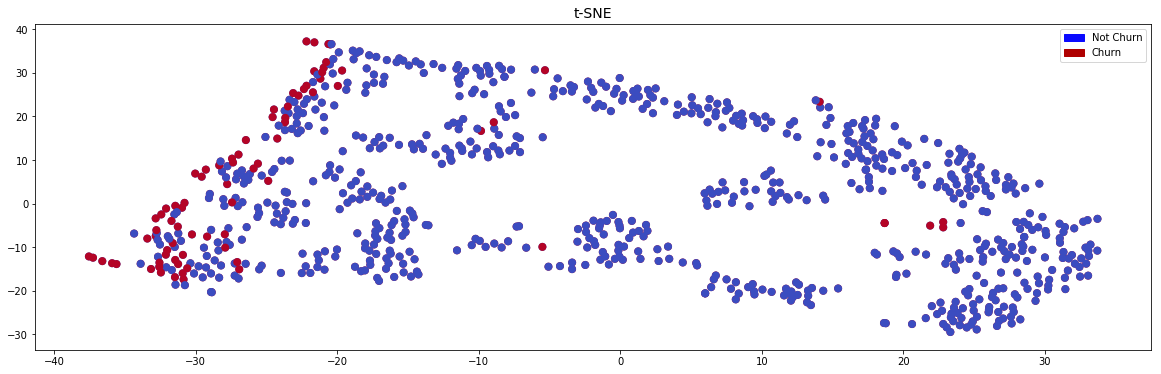

In [54]:
X_reduced_tsne = TSNE(n_components=2, random_state=10).fit_transform(agg_customer.drop('is_churn',axis=1))

y = agg_customer['is_churn']
blue = mpatches.Patch(color='#0A0AFF', label='Not Churn')
red = mpatches.Patch(color='#AF0000', label='Churn')

f, ax1 = plt.subplots(1, 1, figsize=(20,6))

ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), label='Not Churn',cmap='coolwarm', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), label='Churn', cmap='coolwarm', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.legend(handles=[blue, red]);